- Gestionas un hospital.
- Presupuesto y recursos médicos ilimitados.
- El objetivo es salvar tantas vidas como sea posible considerando tales restricciones.
- Debes decidir cuántos procedimientos médicos de diferentes tipos se deben realizar.
- Toma en cuenta la cantidad de vidas que se pueden salvar con cada procedimiento y su costo asociado.


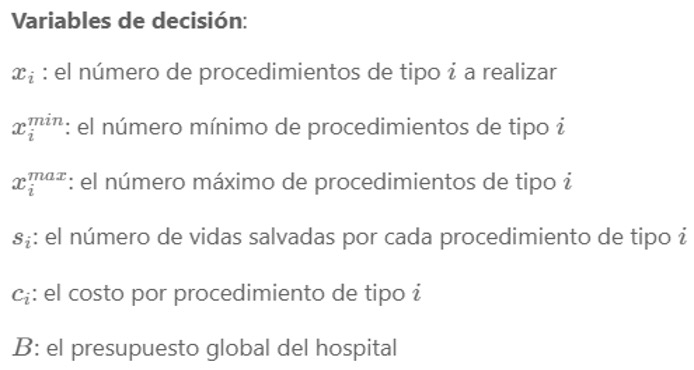

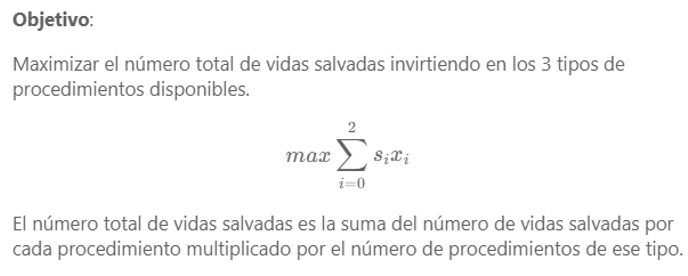

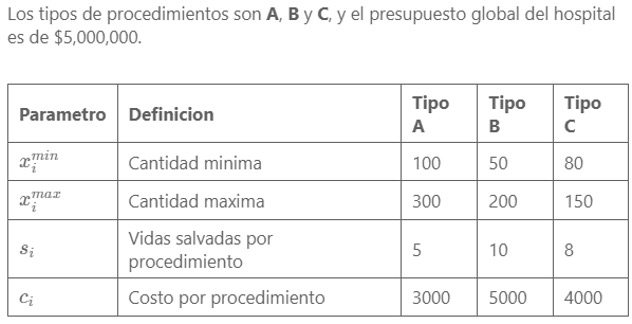

---
### Librerías

In [1]:
from gurobipy import Model, GRB

---
### Solución

In [2]:
#Se define el modelo
m = Model("hospital")

# Parámetros
x_min = [100, 50, 80]     #Cantidad mínima de procedimientos para A, B, C
x_max = [300, 200, 150]   #Cantidad máxima de procedimientos para A, B, C
s = [5, 10, 8]            #Vidas salvadas por procedimiento para A, B, C
c = [3000, 5000, 4000]    #Costo por procedimiento para A, B, C

#Variables de decisión 
#Se utiliza INTEGER porque se busca el numero entero de procedimientos
x = m.addVars(3, vtype=GRB.INTEGER, lb=x_min, ub=x_max, name="x")

#Se define la función objetivo: Maximizar el número total de vidas salvadas
m.setObjective(sum(s[i]*x[i] for i in range(3)), GRB.MAXIMIZE)

#Las restricciones de presupuesto y recursos están omitidas ya que se especificó que son ilimitados

#Se ejecuta el modelo
m.optimize()

#Resultados
for i in range(3):
    print(f"Procedimientos del tipo {chr(65+i)} a realizar: {x[i].x}")

print(f"Total de vidas salvadas: {m.objVal}")


Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 0 rows, 3 columns and 0 nonzeros
Model fingerprint: 0x0cfa26bc
Variable types: 0 continuous, 3 integer (0 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [5e+00, 1e+01]
  Bounds range     [5e+01, 3e+02]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 4700.0000000

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 10 available processors)

Solution count 1: 4700 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.700000000000e+03, best bound 4.700000000000e+03, gap 0.0000%
Procedimientos del tipo A a realizar: 300.0
Procedimientos del tipo B a realizar: 200.0
Procedimientos del tipo C a realizar: 150.0
Total de vidas 